In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Valores reales y predichos
y_true = [20000, 25000, 30000, 22000, 27000]
y_pred = [20498, 24402, 30698, 21601, 27548]
# Cálculo de métricas
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 548.2
MSE: 310463.4
RMSE: 557.1924263663318
R²: 0.975281576433121


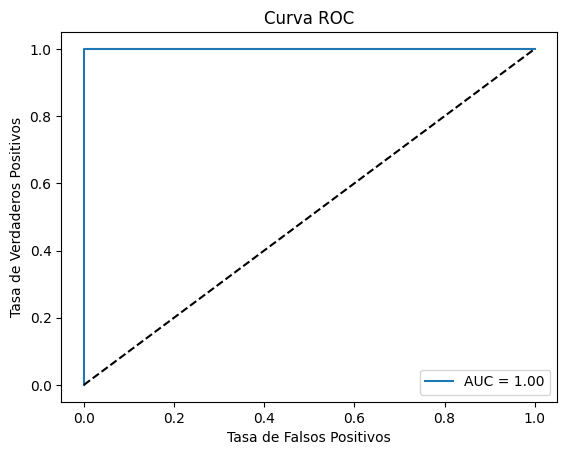

In [3]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Probabilidades predichas y valores reales
y_true = [1, 0, 1, 0, 1]
y_prob = [0.90, 0.40, 0.80, 0.35, 0.70]
# Cálculo de la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
auc = roc_auc_score(y_true, y_prob)
# Visualización
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

### LIVE CODING 1

In [ ]:
# ==========================================================
# DEMO: Métricas en Regresión + Métricas en Clasificación
# ==========================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# ----------------------------------------------------------
# 1) Crear arrays y_true y y_pred (precios reales/predichos)
# ----------------------------------------------------------
# Simulamos "precios reales" y un modelo que comete error
y_true = np.array([100, 120, 130, 150, 170, 200, 220, 250, 280, 300], dtype=float)
error  = np.array([ -5,   8, -10,  12,  -7,  15, -20,  10, -12,   6], dtype=float)
y_pred = y_true + error

df_reg = pd.DataFrame({"y_true": y_true, "y_pred": y_pred, "error": y_true - y_pred})
df_reg

In [ ]:
# ----------------------------------------------------------
# 2) Calcular MAE, MSE, RMSE y R² "a mano"
# ----------------------------------------------------------
# Errores
residuos = y_true - y_pred
abs_err = np.abs(residuos)
sq_err = residuos**2

MAE_manual = abs_err.mean()
MSE_manual = sq_err.mean()
RMSE_manual = np.sqrt(MSE_manual)

# R² = 1 - SSE/SST
SSE = np.sum((y_true - y_pred)**2)
SST = np.sum((y_true - np.mean(y_true))**2)
R2_manual = 1 - SSE/SST

print(f"MAE  (manual): {MAE_manual:.3f}")
print(f"MSE  (manual): {MSE_manual:.3f}")
print(f"RMSE (manual): {RMSE_manual:.3f}")
print(f"R²   (manual): {R2_manual:.3f}")

In [ ]:
# ----------------------------------------------------------
# 3) Repetir con funciones de Scikit-Learn
# ----------------------------------------------------------
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE_skl = mean_absolute_error(y_true, y_pred)
MSE_skl = mean_squared_error(y_true, y_pred)
RMSE_skl = mean_squared_error(y_true, y_pred, squared=False)
R2_skl = r2_score(y_true, y_pred)

print(f"MAE  (sklearn): {MAE_skl:.3f}")
print(f"MSE  (sklearn): {MSE_skl:.3f}")
print(f"RMSE (sklearn): {RMSE_skl:.3f}")
print(f"R²   (sklearn): {R2_skl:.3f}")

In [ ]:
# ----------------------------------------------------------
# 4) Interpretación rápida (para explicarlo en vivo)
# ----------------------------------------------------------
rango = y_true.max() - y_true.min()
print(f"Rango de precios (max-min): {rango:.1f}\n")

print("Cómo interpretar:")
print(f"- MAE ~ {MAE_skl:.2f}: en promedio, te equivocas {MAE_skl:.2f} unidades de precio.")
print(f"- RMSE ~ {RMSE_skl:.2f}: castiga más los errores grandes que el MAE.")
print(f"- R² ~ {R2_skl:.2f}: porcentaje de variabilidad explicada por el modelo (más cerca de 1, mejor).")
print("  Ojo: R² puede ser bajo si hay mucho ruido o si el modelo es muy simple.\n")

# Visual rápido
plt.figure(figsize=(6,4))
plt.scatter(y_true, y_pred)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], linestyle="--")
plt.xlabel("y_true (real)")
plt.ylabel("y_pred (predicho)")
plt.title("Regresión: real vs predicho")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# ----------------------------------------------------------
# 5) Simular un problema de clasificación binaria
# ----------------------------------------------------------
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X, y = make_classification(
    n_samples=1500,
    n_features=10,
    n_informative=4,
    n_redundant=2,
    weights=[0.7, 0.3],   # desbalance leve
    flip_y=0.03,
    class_sep=1.0,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=5000, random_state=42))
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("Distribución de clases en TEST (conteo):")
print(pd.Series(y_test).value_counts())

In [ ]:
# ----------------------------------------------------------
# 6) Matriz de confusión + precisión, exactitud, sensibilidad, especificidad
# ----------------------------------------------------------
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0             # sensibilidad
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0        # especificidad
f1 = 2*(precision*recall)/(precision+recall) if (precision+recall)>0 else 0

print("Matriz de confusión [[TN FP],[FN TP]]:")
print(cm, "\n")

print(f"Exactitud (Accuracy)     : {accuracy:.4f}")
print(f"Precisión (Precision)    : {precision:.4f}")
print(f"Sensibilidad (Recall/TPR): {recall:.4f}")
print(f"Especificidad (TNR)      : {specificity:.4f}")
print(f"F1-score                 : {f1:.4f}")

In [ ]:
# (Opcional) classification_report para verlo “bonito”
from sklearn.metrics import classification_report
print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))

In [ ]:
# ----------------------------------------------------------
# 7) Curva ROC + AUC
# ----------------------------------------------------------
from sklearn.metrics import roc_curve, roc_auc_score

auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

print(f"AUC: {auc:.4f}")

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC (AUC={auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Azar")
plt.xlabel("FPR (1 - especificidad)")
plt.ylabel("TPR (sensibilidad/recall)")
plt.title("Curva ROC")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## EJERCICIO 1

| Cliente | Real | Modelo A | Modelo B |
| ------- | ---- | -------- | -------- |
| 1       | 1200 | 1300     | 1100     |
| 2       | 2500 | 2400     | 2600     |
| 3       | 1800 | 1750     | 1950     |
| 4       | 3100 | 3300     | 3000     |
| 5       | 1500 | 1400     | 1550     |


In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Datos del enunciado
df = pd.DataFrame({
    "cliente": [1, 2, 3, 4, 5],
    "real":    [1200, 2500, 1800, 3100, 1500],
    "modelo_a":[1300, 2400, 1750, 3300, 1400],
    "modelo_b":[1100, 2600, 1950, 3000, 1550],
})

df

,cliente,real,modelo_a,modelo_b
0,1,1200,1300,1100
1,2,2500,2400,2600
2,3,1800,1750,1950
3,4,3100,3300,3000
4,5,1500,1400,1550


In [47]:
# Función para métricas
def metricas_regresion(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse) # Corrección: calcular RMSE tomando la raíz cuadrada del MSE
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

y_true = df["real"].values

mae_a, mse_a, rmse_a, r2_a = metricas_regresion(y_true, df["modelo_a"].values)
mae_b, mse_b, rmse_b, r2_b = metricas_regresion(y_true, df["modelo_b"].values)

resultados = pd.DataFrame({
    "modelo": ["A", "B"],
    "MAE": [mae_a, mae_b],
    "MSE": [mse_a, mse_b],
    "RMSE": [rmse_a, rmse_b],
    "R2": [r2_a, r2_b],
})

# Redondear para mostrar bonito
resultados.round(4)

,modelo,MAE,MSE,RMSE,R2
0,A,110.0,14500.0,120.4159,0.9696
1,B,100.0,11000.0,104.8809,0.9770


In [48]:
# (Opcional) ver errores por cliente para explicar en clase
df["error_A"] = df["real"] - df["modelo_a"]
df["error_B"] = df["real"] - df["modelo_b"]
df["abs_error_A"] = df["error_A"].abs()
df["abs_error_B"] = df["error_B"].abs()

df

,cliente,real,modelo_a,modelo_b,error_A,error_B,abs_error_A,abs_error_B
0,1,1200,1300,1100,-100,100,100,100
1,2,2500,2400,2600,100,-100,100,100
2,3,1800,1750,1950,50,-150,50,150
3,4,3100,3300,3000,-200,100,200,100
4,5,1500,1400,1550,100,-50,100,50


In [49]:
# Conclusión automática (simple)
mejor_mae = resultados.loc[resultados["MAE"].idxmin(), "modelo"]
mejor_rmse = resultados.loc[resultados["RMSE"].idxmin(), "modelo"]
mejor_r2 = resultados.loc[resultados["R2"].idxmax(), "modelo"]

print("Mejor por MAE :", mejor_mae)
print("Mejor por RMSE:", mejor_rmse)
print("Mejor por R²  :", mejor_r2)

if mejor_mae == mejor_rmse == mejor_r2:
    print(f"\n Recomendación: Modelo {mejor_mae} (mejor en todas las métricas).")
else:
    print("\n Las métricas no coinciden. Revisa el criterio de negocio (costo de errores grandes, etc.).")

Mejor por MAE : B
Mejor por RMSE: B
Mejor por R²  : B

 Recomendación: Modelo B (mejor en todas las métricas).


# **PARTE 2**

In [4]:
from sklearn.metrics import classification_report
# Valores reales y predichos
y_true = [1, 0, 1, 0, 1]
y_pred = [1, 0, 0, 0, 1]
# Generar informe de clasificación
report = classification_report(y_true, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [5]:
import numpy as np
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

# Ejemplo de clasificación
X, y = make_classification(n_samples=1000, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Métricas de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Matriz de Confusión:\n", conf_matrix)
print(f"Exactitud: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Sensibilidad: {recall:.4f}")
print(f"AUC: {auc:.4f}")

# Ejemplo de regresión
X, y = make_regression(n_samples=1000, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Métricas de regresión
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nMAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Matriz de Confusión:
 [[127  18]
 [ 27 128]]
Exactitud: 0.8500
Precisión: 0.8767
Sensibilidad: 0.8258
AUC: 0.9142

MAE: 0.0000
MSE: 0.0000
RMSE: 0.0000
R²: 1.0000


In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, random_state=42)

# Crear modelo
model = LogisticRegression()

# Realizar validación cruzada con 5 folds
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Mostrar resultados
print(f"Exactitud por fold: {scores}")
print(f"Exactitud media: {scores.mean():.4f}")
print(f"Desviación estándar: {scores.std():.4f}")

Exactitud por fold: [0.9   0.885 0.875 0.83  0.845]
Exactitud media: 0.8670
Desviación estándar: 0.0258


## Live Coding 2

Vamos a construir un flujo de evaluación de modelo para clasificación, usando un dataset multiclase. Implementaremos validación cruzada, calcularemos múltiples métricas y analizaremos sus diferencias.

1. Importar un dataset multiclase (load_wine de sklearn.datasets).



In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, f1_score, accuracy_score


In [29]:
from sklearn.datasets import load_wine

wine = load_wine()
# Crear un DataFrame para que sea más legible
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target
class_names = wine.target_names

print(f"Dimensiones del dataset: {df.shape}")
df.head()

Dimensiones del dataset: (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [18]:
descripciones = {
    "alcohol": "Porcentaje de alcohol (grado alcohólico).",
    "malic_acid": "Ácido málico (acidez asociada al vino).",
    "ash": "Cenizas: contenido mineral total aproximado.",
    "alcalinity_of_ash": "Alcalinidad de las cenizas (medida relacionada a minerales/sales).",
    "magnesium": "Magnesio.",
    "total_phenols": "Fenoles totales (compuestos asociados a sabor/astringencia).",
    "flavanoids": "Flavonoides (subgrupo de fenoles).",
    "nonflavanoid_phenols": "Fenoles no flavonoides (otro subgrupo de fenoles).",
    "proanthocyanins": "Proantocianidinas (taninos/compuestos fenólicos).",
    "color_intensity": "Intensidad del color.",
    "hue": "Tonalidad (matiz) del color.",
    "od280/od315_of_diluted_wines": "Relación de absorbancia OD280/OD315 en vinos diluidos (indicador asociado a fenoles).",
    "proline": "Prolina (un aminoácido presente en el vino).",
}

df_diccionario = pd.DataFrame({
    "campo": wine.feature_names,
    "descripcion": [descripciones.get(f, "") for f in wine.feature_names]
})

df_diccionario

,campo,descripcion
0,alcohol,Porcentaje de alcohol (grado alcohólico).
1,malic_acid,Ácido málico (acidez asociada al vino).
2,ash,Cenizas: contenido mineral total aproximado.
3,alcalinity_of_ash,Alcalinidad de las cenizas (medida relacionada...
4,magnesium,Magnesio.
5,total_phenols,Fenoles totales (compuestos asociados a sabor/...
6,flavanoids,Flavonoides (subgrupo de fenoles).
7,nonflavanoid_phenols,Fenoles no flavonoides (otro subgrupo de fenol...
8,proanthocyanins,Proantocianidinas (taninos/compuestos fenólicos).
9,color_intensity,Intensidad del color.


2. Entrenar un modelo con RandomForestClassifier.

In [19]:
df['target'].value_counts()

,count
target,
1,71
0,59
2,48


In [35]:
df["target"].value_counts(normalize=True).mul(100).round(2)

,proportion
target,
1,39.89
0,33.15
2,26.97


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y        # preserva proporción de clases
)

In [21]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])
pipeline.fit(X_train, y_train)

y_pred  = pipeline.predict(X_test)

3. Evaluar el modelo con cross_val_score usando accuracy y f1_macro.

In [24]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)

acc_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
f1_scores  = cross_val_score(model, X, y, cv=cv, scoring='f1_macro')

print(f"\n  Accuracy por fold : {np.round(acc_scores, 4)}")
print(f"  Media ± Std       : {acc_scores.mean():.4f} ± {acc_scores.std():.4f}")
print(f"\n  F1-Macro por fold : {np.round(f1_scores, 4)}")
print(f"  Media ± Std       : {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")


  Accuracy por fold : [0.9722 1.     0.9722 0.9429 1.    ]
  Media ± Std       : 0.9775 ± 0.0213

  F1-Macro por fold : [0.9718 1.     0.9718 0.9484 1.    ]
  Media ± Std       : 0.9784 ± 0.0196


4. Mostrar matriz de confusión total con confusion_matrix.

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]])

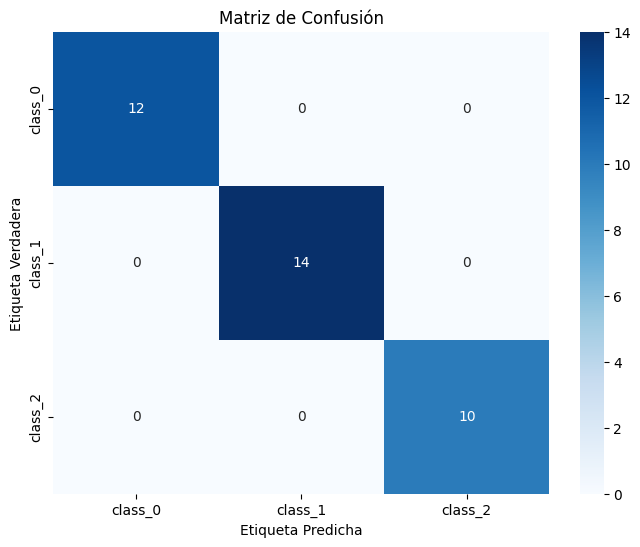

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

5. Usar classification_report para ver métricas completas.

In [33]:
print("\nClassification report:\n", classification_report(y_test, y_pred))


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



6. Visualizar curvas ROC para cada clase (One-vs-Rest).

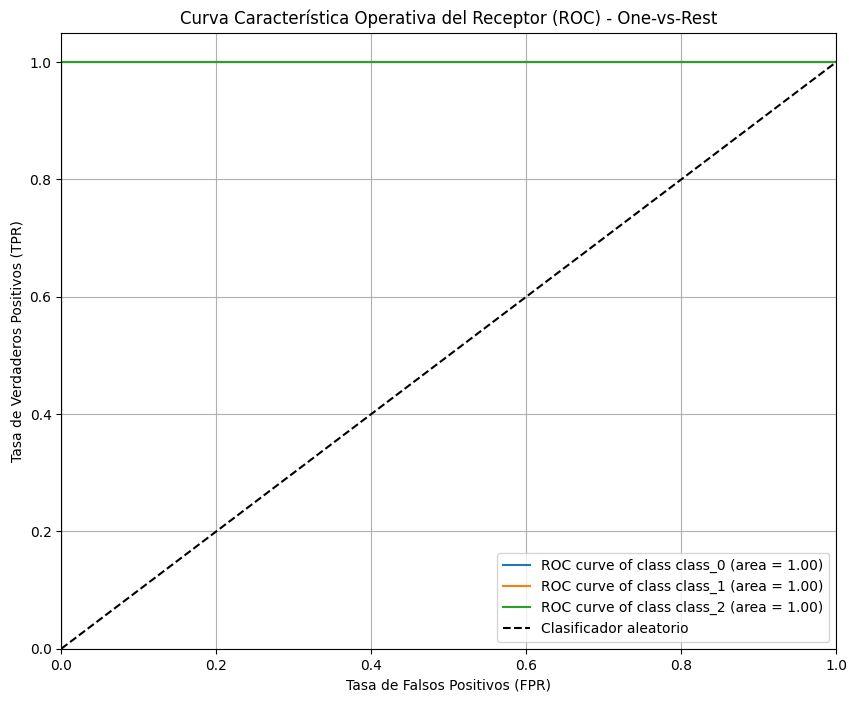

In [34]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de predicción para cada clase en el conjunto de prueba
y_prob_ovr = pipeline.predict_proba(X_test)

# Binarizar las etiquetas verdaderas para el enfoque One-vs-Rest
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Preparar el plot
plt.figure(figsize=(10, 8))

# Calcular y graficar la curva ROC para cada clase
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_ovr[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve of class {class_names[i]} (area = {roc_auc:.2f})')

# Graficar la línea de no discriminación (clasificador aleatorio)
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva Característica Operativa del Receptor (ROC) - One-vs-Rest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Explicación de la apariencia de las Curvas ROC (por qué no se ven todas las líneas)

La razón por la que las curvas ROC no muestran muchas líneas distintas o una curva suave se debe a que el modelo de clasificación está funcionando de manera excelente en el conjunto de prueba. Cuando un modelo tiene una capacidad de discriminación perfecta (o casi perfecta), como es el caso cuando se obtiene un AUC de 1.0 para cada clase, la curva ROC se comporta de una manera particular.

En un escenario ideal con discriminación perfecta, el modelo puede separar completamente las clases sin cometer errores significativos en el conjunto de prueba. Esto significa que el clasificador puede alcanzar una **Tasa de Verdaderos Positivos (TPR)** muy alta (cercana o igual al 100%) con una **Tasa de Falsos Positivos (FPR)** muy baja (cercana o igual al 0%).

Gráficamente, esto se traduce en que la curva ROC sube casi verticalmente desde el punto (0,0) hasta (0,1) y luego se mantiene horizontalmente hasta (1,1), o se mueve directamente hacia la esquina superior izquierda del gráfico. Al no haber muchos errores de clasificación que generen tasas intermedias de falsos positivos y verdaderos positivos, la curva no tiene la oportunidad de mostrar las "dobleces" o "líneas" que se verían en un modelo con un rendimiento menos perfecto. En esencia, la curva es una línea casi recta que abraza los ejes izquierdo y superior, lo que indica que el modelo es casi perfecto en la separación de las clases en el conjunto de datos de prueba.

7. Explicar cuándo cada métrica resulta más útil.

Para modelos de clasificación, métricas como la Exactitud (Accuracy) son útiles cuando las clases están balanceadas y el costo de los falsos positivos y falsos negativos es similar. Sin embargo, para datasets desbalanceados, la Precisión (Precision) y la Sensibilidad (Recall) (o Falsos Positivos y Falsos Negativos) son más informativas; la precisión es crucial cuando minimizar los falsos positivos es prioritario (ej., diagnóstico médico), mientras que la sensibilidad es clave cuando minimizar los falsos negativos es más importante (ej., detección de fraudes). El F1-Score ofrece un balance entre precisión y sensibilidad. La Matriz de Confusión proporciona una visión detallada de los aciertos y errores por clase, y la Curva ROC y AUC son excelentes para evaluar el rendimiento general del clasificador y su capacidad de discriminación, siendo particularmente útiles para comparar modelos sin importar el umbral de clasificación.

8. Simular un pipeline productivo y evaluar su estabilidad con múltiples métricas.

## Ejercicio 2

Distribución de clases (conteo):
target
0    1297
1     703
Name: count, dtype: int64 

Distribución de clases (%):
target
0    64.85
1    35.15
Name: proportion, dtype: float64 

=== Métricas (Test) ===
Accuracy : 0.8420
Precision: 0.8170
Recall   : 0.7102
F1-score : 0.7599
ROC AUC  : 0.9111

Matriz de confusión [[TN FP],[FN TP]]:
[[296  28]
 [ 51 125]] 



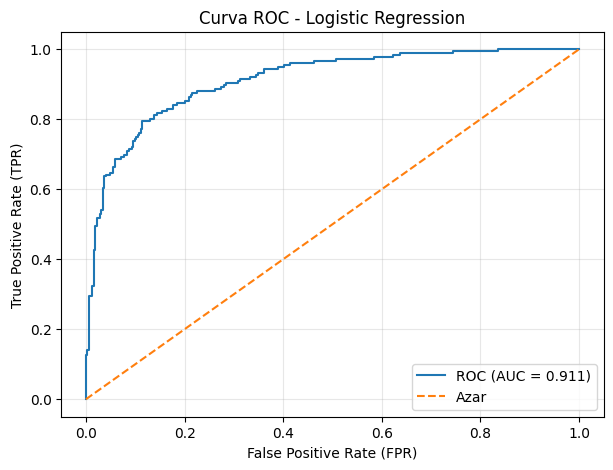

=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0     0.8530    0.9136    0.8823       324
           1     0.8170    0.7102    0.7599       176

    accuracy                         0.8420       500
   macro avg     0.8350    0.8119    0.8211       500
weighted avg     0.8403    0.8420    0.8392       500


=== Validación cruzada (Accuracy, 5-fold) ===
Scores por fold: [0.85   0.8275 0.8375 0.84   0.8275]
Media: 0.8365
Desv.: 0.0085

Conclusión (en simple):
- Accuracy puede engañar si las clases están desbalanceadas.
- Precision importa si un falso positivo (recomendar algo incorrecto) cuesta caro.
- Recall importa si un falso negativo (no recomendar algo que sí era relevante) cuesta más.
- F1 equilibra precision y recall cuando ambos errores importan.
- ROC AUC sirve para comparar modelos en general y para pensar en distintos umbrales,
  pero para negocio conviene mirar también la matriz de confusión y el costo de FP vs FN.



In [41]:
# =========================================
# 1) Dataset binario (make_classification)
# =========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, classification_report, confusion_matrix
)

RANDOM_STATE = 42

X, y = make_classification(
    n_samples=2000,
    n_features=20,
    n_informative=6,
    n_redundant=4,
    n_clusters_per_class=2,
    weights=[0.65, 0.35],   # desbalance leve (ajustable)
    flip_y=0.02,            # un poco de ruido (ajustable)
    class_sep=1.0,          # separabilidad (ajustable)
    random_state=RANDOM_STATE
)

# (Opcional) Crear un DataFrame para mirar/depurar más fácil
df = pd.DataFrame(X, columns=[f"f{i}" for i in range(X.shape[1])])
df["target"] = y

print("Distribución de clases (conteo):")
print(df["target"].value_counts(), "\n")

print("Distribución de clases (%):")
print((df["target"].value_counts(normalize=True) * 100).round(2), "\n")


# =========================================
# 2) Train/Test split
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=RANDOM_STATE
)

# Pipeline: escalado + Logistic Regression
model = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, random_state=RANDOM_STATE))
])

model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # probabilidad de clase positiva


# =========================================
# 3) Métricas + ROC AUC + Curva ROC
# =========================================
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
auc = roc_auc_score(y_test, y_proba)

print("=== Métricas (Test) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {auc:.4f}\n")

# Matriz de confusión (útil para negocio/costos)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión [[TN FP],[FN TP]]:")
print(cm, "\n")

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"ROC (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Azar")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Curva ROC - Logistic Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# =========================================
# 4) classification_report
# =========================================
print("=== Classification Report (Test) ===")
print(classification_report(y_test, y_pred, digits=4))


# =========================================
# 5) Validación cruzada (5 folds): accuracy media y std
# =========================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")

print("\n=== Validación cruzada (Accuracy, 5-fold) ===")
print("Scores por fold:", np.round(cv_scores, 4))
print(f"Media: {cv_scores.mean():.4f}")
print(f"Desv.: {cv_scores.std():.4f}")


# =========================================
# 6) Conclusión breve (para el caso de negocio)
# =========================================
conclusion = """
Conclusión (en simple):
- Accuracy puede engañar si las clases están desbalanceadas.
- Precision importa si un falso positivo (recomendar algo incorrecto) cuesta caro.
- Recall importa si un falso negativo (no recomendar algo que sí era relevante) cuesta más.
- F1 equilibra precision y recall cuando ambos errores importan.
- ROC AUC sirve para comparar modelos en general y para pensar en distintos umbrales,
  pero para negocio conviene mirar también la matriz de confusión y el costo de FP vs FN.
"""
print(conclusion)

# Task
Corregir el cálculo de RMSE en la función `metricas_regresion` en la celda `cu5bt4Bp4smV` usando `np.sqrt(mse)` y luego ejecutar esa celda.

## Corregir el cálculo de RMSE

### Subtask:
Modificar la función `metricas_regresion` para calcular el RMSE tomando la raíz cuadrada del MSE, en lugar de pasar el argumento `squared=False` a `mean_squared_error`.


**Reasoning**:
The subtask requires modifying the `metricas_regresion` function to correctly calculate RMSE by taking the square root of MSE, instead of using the `squared=False` argument, which caused a TypeError. I will provide the updated function in a code block.



In [45]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Función para métricas
def metricas_regresion(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse) # Se corrigió el cálculo de RMSE
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

y_true = df["real"].values

mae_a, mse_a, rmse_a, r2_a = metricas_regresion(y_true, df["modelo_a"].values)
mae_b, mse_b, rmse_b, r2_b = metricas_regresion(y_true, df["modelo_b"].values)

resultados = pd.DataFrame({
    "modelo": ["A", "B"],
    "MAE": [mae_a, mae_b],
    "MSE": [mse_a, mse_b],
    "RMSE": [rmse_a, rmse_b],
    "R2": [r2_a, r2_b],
})

# Redondear para mostrar bonito
resultados.round(4)

,modelo,MAE,MSE,RMSE,R2
0,A,110.0,14500.0,120.4159,0.9696
1,B,100.0,11000.0,104.8809,0.9770


## Summary:

### Data Analysis Key Findings

*   The `metricas_regresion` function was successfully modified to correctly calculate the Root Mean Squared Error (RMSE) by taking the square root of the Mean Squared Error (MSE) using `np.sqrt(mse)`. Previously, it incorrectly attempted to use `mean_squared_error(..., squared=False)`, which caused a `TypeError`.
*   After the correction, the calculated RMSE for `modelo_a` is 120.4159, derived from an MSE of 14500.0.
*   For `modelo_b`, the corrected RMSE is 104.8809, derived from an MSE of 11000.0.
*   The updated RMSE values are consistent with the square root of their corresponding MSE values, confirming the successful implementation of the correction.

### Insights or Next Steps

*   The corrected RMSE calculation provides accurate and reliable performance metrics for regression models, which is crucial for robust model evaluation and comparison.
*   The revised `metricas_regresion` function can now be confidently used to assess future model iterations or different models, ensuring that the RMSE metric is computed correctly.
